##Нейронныйе сети
Внутри модели много различных формул зашитых внутри пороговое значенеие изначально можно задать рандомно
функции для реализации в презенташке
функции потерь MAE MSE

In [1]:
import pandas as pd
import numpy as np

In [2]:
#X = np.random.uniform(low=0, high=20, size=(12, 2))
X = np.array([[5, 7], [4, 18], [2, 9], [3, 7], [8, 6], [4, 4], [3, 11], [2, 15], [5, 4], [4, 7]])
# Метки классов (0 - гусеница, 1 - бабочка)
#y = np.random.randint(low=0, high=2, size=(12, 1))
y = np.array([[0], [1], [1], [0], [0], [0], [1], [1], [0], [0]])

In [3]:
class neural_network:
  # Веса и смещения инициализируются случайными значениями.
    def __init__(self, input_size):
        self.input_size = input_size
        self.hidden_size = 4  # Количество нейронов в скрытом слое
        self.output_size = 1  # Количество нейронов в выходном слое

        # Инициализация весов
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        # Инициализация смещений
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    #возвращает производную
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        # Вычисление выхода скрытого слоя
        self.hidden_output = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        #вычмсление окончательного выхода сети
        self.output = self.sigmoid(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output
    # Обратное распространение ошибки
    def backpropagation(self, X, y, learning_rate):
        #  позволяет сети "узнавать" на своих ошибках и корректировать свои параметры для минимизации ошибки.
        error = y - self.output
        delta_output = error * self.sigmoid_derivative(self.output)

        # Размерность delta_output должна быть (n_samples, 1)
        delta_output = delta_output.reshape(-1, 1)

        error_hidden = delta_output.dot(self.weights_hidden_output.T)
        delta_hidden = error_hidden * self.sigmoid_derivative(self.hidden_output)

        # Обновление весов и смещений
        self.weights_hidden_output += self.hidden_output.T.dot(delta_output) * learning_rate
        self.weights_input_hidden += X.T.dot(delta_hidden) * learning_rate

        self.bias_output += np.sum(delta_output, axis=0) * learning_rate
        self.bias_hidden += np.sum(delta_hidden, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        errors = []  # Список для хранения значений ошибки на каждой итерации
        for epoch in range(epochs):
            # Прямой проход
            output = self.feedforward(X)

            # Обратное распространение ошибки и обновление весов
            self.backpropagation(X, y, learning_rate)

            # Вычисление текущей ошибки и добавление в список
            error = np.mean(np.abs(y - output))
            errors.append(error)

            if epoch % 1000 == 0:
                print(f'Epoch {epoch}, Error: {error:.4f}')

        # Возвращаем список значений ошибки для построения графика
        return errors

In [4]:
# Создание и обучение
nn = neural_network(input_size=2)
errors = nn.train(X, y, epochs=10000, learning_rate=0.1)

# Тестирование
new_data = np.array([[9, 8],
                     [2, 20],
                     [4, 6],
                     [4, 8]])
predictions = nn.feedforward(new_data)
print("Predictions:")
print(predictions)

Epoch 0, Error: 0.4423
Epoch 1000, Error: 0.0480
Epoch 2000, Error: 0.0267
Epoch 3000, Error: 0.0212
Epoch 4000, Error: 0.0180
Epoch 5000, Error: 0.0159
Epoch 6000, Error: 0.0143
Epoch 7000, Error: 0.0132
Epoch 8000, Error: 0.0122
Epoch 9000, Error: 0.0114
Predictions:
[[0.00640488]
 [0.99073108]
 [0.00725972]
 [0.00945423]]


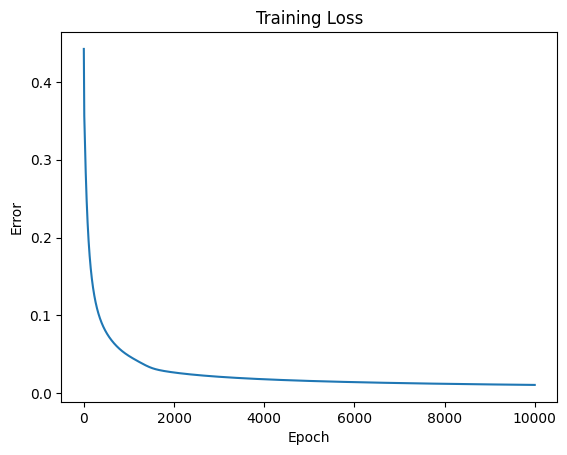

In [5]:
import matplotlib.pyplot as plt
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training Loss')
plt.show()